In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pool_functions import combine, totals, upset_counter, week_pick_percent, points_per_win, sum_totals
from pool_functions import results

ImportError: cannot import name 'results' from 'pool_functions' (c:\Users\mzwartz\Documents\GitHub\Confidence-pool\pool_functions.py)

In [3]:
#calculate total points and picks
week1_stats = totals(results['week1'])
week2_stats = totals(results['week2'])
week3_stats = totals(results['week3'])
week4_stats = totals(results['week4'])
week5_stats = totals(results['week5'])
week6_stats = totals(results['week6'])
week7_stats = totals(results['week7'])


#create season total df 
season_totals = pd.DataFrame(week1_stats.copy(), columns=['Score', 'Game Count'])
season_totals['Week 1 Rank'] = season_totals['Score'].rank(ascending=False, method='min')

#use sum_total function to add points for season total 
sum_totals(season_totals, week2_stats, 'Week 2 Rank')
sum_totals(season_totals, week3_stats, 'Week 3 Rank')
sum_totals(season_totals, week4_stats, 'Week 4 Rank')
sum_totals(season_totals, week5_stats, 'Week 5 Rank')
sum_totals(season_totals, week6_stats, 'Week 6 Rank')
sum_totals(season_totals, week7_stats, 'Week 7 Rank')

#caluculate the position change from the previous week 
season_totals['Rank Change Value'] = round(season_totals[season_totals.columns[len(season_totals.columns)-1]]-season_totals[season_totals.columns[len(season_totals.columns)-2]], 0)

In [4]:
week5_stats.head()

,Score,Game Count,Pick Percentage,Points per win
Game,,,,
abfarias,81,9,56.25,9.00
Bob Z,105,13,81.25,8.08
Ellieisawesome1,93,10,62.50,9.30
JJapcon,76,8,50.00,9.50
Kathy Zwartz,87,9,56.25,9.67


In [5]:
best_worst_dic = {'Week': 1, 'Highest Score': week1_stats['Score'].idxmax(), 'Best Selections': week1_stats['Pick Percentage'].idxmax(), 'Correct Pick Percentage': week1_stats['Pick Percentage'].max(), 'Worst Selections': week1_stats['Pick Percentage'].idxmin(), 'Worst Pick Percentage': week1_stats['Pick Percentage'].min()}
best_worst = pd.DataFrame(best_worst_dic, index=[0])
best_worst.loc[len(best_worst.index)] = [2, week2_stats['Score'].idxmax(), week2_stats['Pick Percentage'].idxmax(), week2_stats['Pick Percentage'].max(),  week2_stats['Pick Percentage'].idxmin(), week2_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [3, week3_stats['Score'].idxmax(), week3_stats['Pick Percentage'].idxmax(), week3_stats['Pick Percentage'].max(),  week3_stats['Pick Percentage'].idxmin(), week3_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [4, week4_stats['Score'].idxmax(), week4_stats['Pick Percentage'].idxmax(), week4_stats['Pick Percentage'].max(),  week4_stats['Pick Percentage'].idxmin(), week4_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [5, week5_stats['Score'].idxmax(), week5_stats['Pick Percentage'].idxmax(), week5_stats['Pick Percentage'].max(),  week5_stats['Pick Percentage'].idxmin(), week5_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [6, week6_stats['Score'].idxmax(), week6_stats['Pick Percentage'].idxmax(), week6_stats['Pick Percentage'].max(),  week6_stats['Pick Percentage'].idxmin(), week6_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [7, week7_stats['Score'].idxmax(), week7_stats['Pick Percentage'].idxmax(), week7_stats['Pick Percentage'].max(),  week7_stats['Pick Percentage'].idxmin(), week7_stats['Pick Percentage'].min()]

best_worst

,Week,Highest Score,Best Selections,Correct Pick Percentage,Worst Selections,Worst Pick Percentage
0,1,Kathy Zwartz,Kathy Zwartz,81.25,MattWojtanek,37.50
1,2,Ellieisawesome1,Ellieisawesome1,87.50,UrBoiJZ,31.25
2,3,Lizzy_Z,Lizzy_Z,87.50,Wild Bill,31.25
3,4,Michael Zwartz,Michael Zwartz,75.00,Ellieisawesome1,37.50
4,5,Ken,Bob Z,81.25,Lizzy_Z,43.75
5,6,Team Boylan,Team Boylan,78.57,abfarias,42.86
6,7,taz7611,PBW,71.43,Michael Zwartz,28.57


In [6]:
season_totals['Rank Change'] = 0
season_totals[''] = " "

i = 0
while i < len(season_totals.index): 
    if season_totals['Rank Change Value'][i] < 0:
        season_totals.loc[season_totals.index[i], ''] = u'\u2191' #up arrow
        season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    elif season_totals['Rank Change Value'][i] == 0: 
        season_totals.loc[season_totals.index[i], ''] = "--"
        season_totals.loc[season_totals.index[i], 'Rank Change'] = 0
    else:
       season_totals.loc[season_totals.index[i], ''] = u'\u2193' #down arrow
       season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    i = i+ 1

In [7]:
season_totals[['Score', 'Game Count', 'Week 7 Rank', 'Rank Change', '']].sort_values(['Week 7 Rank'])

,Score,Game Count,Week 7 Rank,Rank Change,
Game,,,,,
Ken,581,64,1.0,1,↑
Bob Z,576,71,2.0,1,↓
Lindsey,555,63,3.0,1,↑
Zapp,547,66,4.0,1,↓
PBW,536,64,5.0,2,↑
Wild Bill,536,62,5.0,3,↑
Kathy Zwartz,533,61,7.0,2,↓
taz7611,533,57,7.0,7,↑
Team Boylan,531,59,9.0,1,↓


In [19]:
week7_stats = week7_tot[['Game', 'Score', 'Game Count', 'Max Score']][4:]
week7_stats['Week 7 Rank'] = week7_stats['Score'].rank(ascending=False)
week7_stats.sort_values(['Max Score'], ascending=False).head()

,Game,Score,Game Count,Max Score,Week 7 Rank
32,taz7611,103,10,106,1.0
26,PBW,89,10,102,6.5
16,Lindsey,90,8,100,5.0
28,Shaner,96,9,100,2.0
38,Wild Bill,91,10,94,3.5


In [ ]:
#upset count
upset_count1 = upset_counter(week1)
upset_count2 = upset_counter(week2)
upset_count3 = upset_counter(week3)
upset_count4 = upset_counter(week4)
upset_count5 = upset_counter(week5)
upset_count6 = upset_counter(week6)
upset_count7 = upset_counter(week7)

In [ ]:
max1 = week1_stats['Game Count'].nlargest(2)
min1 = week1_stats.min()
med1 = week6_stats['Game Count'].median()
max1

In [22]:
tots = {'Week': 1, 'Correct Pick Percentage': week_pick_percent(week1_raw, week1_stats['Game Count'].sum()), 'Avg Points per Win': points_per_win(week1_stats), 'Winner Pts': week1_stats['Score'].max(), 'Worst Player Pts': week1_stats['Score'].min(), 'Number of Upsets': upset_count1[0]}
weekly_stats = pd.DataFrame(tots, index=[0])
weekly_stats.loc[len(weekly_stats.index)] = [2, week_pick_percent(week2_raw, week2_stats['Game Count'].sum()), points_per_win(week2_stats), week2_stats['Score'].max(), week2_stats['Score'].min(), upset_count2[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [3, week_pick_percent(week3_raw, week3_stats['Game Count'].sum()), points_per_win(week3_stats), week3_stats['Score'].max(), week3_stats['Score'].min(), upset_count3[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [4, week_pick_percent(week4_raw, week4_stats['Game Count'].sum()), points_per_win(week4_stats), week4_stats['Score'].max(), week4_stats['Score'].min(), upset_count4[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [5, week_pick_percent(week5_raw, week5_stats['Game Count'].sum()), points_per_win(week5_stats), week5_stats['Score'].max(), week5_stats['Score'].min(), upset_count5[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [6, week_pick_percent(week6_raw, week6_stats['Game Count'].sum()), points_per_win(week6_stats), week6_stats['Score'].max(), week6_stats['Score'].min(), upset_count6[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [7, week_pick_percent(week7_raw, week7_stats['Game Count'].sum()), points_per_win(week7_stats), week7_stats['Score'].max(), week7_stats['Score'].min(), upset_count7[0]] 

weekly_stats



,Week,Correct Pick Percentage,Avg Points per Win,Winner Pts,Worst Player Pts,Number of Upsets
0,1.0,51.97,7.41,97.0,45.0,6.0
1,2.0,52.96,9.05,114.0,48.0,5.0
2,3.0,50.00,8.53,107.0,40.0,9.0
3,4.0,57.57,8.78,108.0,51.0,5.0
4,5.0,61.84,9.12,117.0,58.0,4.0
5,6.0,53.76,8.80,96.0,43.0,7.0
6,7.0,63.16,9.76,103.0,41.0,6.0


Text(0.5, 0, 'Week')

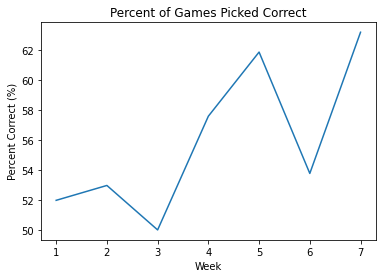

In [14]:
plt.plot(weekly_stats['Week'], weekly_stats['Correct Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")

In [27]:
#create weely totals df to track totals each week
weekly_totals = pd.concat([week1_stats.rename(columns={"Score": "Week 1 Score", "Game Count": "Week 1 Game Count"}),
 week2_stats.rename(columns={"Score": "Week 2 Score", "Game Count": "Week 2 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week3_stats.rename(columns={"Score": "Week 3 Score", "Game Count": "Week 3 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week4_stats.rename(columns={"Score": "Week 4 Score", "Game Count": "Week 4 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week5_stats.rename(columns={"Score": "Week 5 Score", "Game Count": "Week 5 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week6_stats.rename(columns={"Score": "Week 6 Score", "Game Count": "Week 6 Game Count"})], axis=1)
weekly_totals

,Week 1 Score,Week 1 Game Count,Pick Percentage,Points per win,Week 2 Score,Week 2 Game Count,Pick Percentage,Points per win,Week 3 Score,Week 3 Game Count,...,Pick Percentage,Points per win,Week 5 Score,Week 5 Game Count,Pick Percentage,Points per win,Week 6 Score,Week 6 Game Count,Pick Percentage,Points per win
Game,,,,,,,,,,,,,,,,,,,,,
abfarias,52,7,43.75,7.43,74,7,43.75,10.57,84,8,...,50.00,10.38,81,9,56.25,9.00,46,6,42.86,7.67
Bob Z,72,11,68.75,6.55,86,10,62.50,8.60,61,9,...,68.75,9.18,105,13,81.25,8.08,72,8,57.14,9.00
Ellieisawesome1,61,8,50.00,7.62,114,14,87.50,8.14,56,8,...,37.50,8.50,93,10,62.50,9.30,54,6,42.86,9.00
JJapcon,60,8,50.00,7.50,81,9,56.25,9.00,65,6,...,62.50,10.20,76,8,50.00,9.50,51,6,42.86,8.50
Kathy Zwartz,97,13,81.25,7.46,79,9,56.25,8.78,66,8,...,56.25,8.11,87,9,56.25,9.67,59,7,50.00,8.43
Ken,67,9,56.25,7.44,79,8,50.00,9.88,72,8,...,50.00,8.75,117,13,81.25,9.00,85,9,64.29,9.44
Lindsey,53,8,50.00,6.62,71,9,56.25,7.89,96,12,...,62.50,8.90,96,10,62.50,9.60,60,6,42.86,10.00
Lizzy_Z,45,7,43.75,6.43,73,8,50.00,9.12,107,14,...,56.25,8.56,58,7,43.75,8.29,72,8,57.14,9.00
Matt McKenna,56,8,50.00,7.00,64,6,37.50,10.67,74,7,...,62.50,9.20,88,9,56.25,9.78,43,6,42.86,7.17
